<a href="https://colab.research.google.com/github/CodingCat-Jung/MSF_AI-900/blob/main/MSF_AI_900_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision Service**

API를 사용하여 컴퓨터 비전 서비스를 사용
1. key, endpoint 값 설정

In [4]:
key = 'GJzODeS7DmKZXzZJamJoZLPp81ik8fcvh1rtPNQPkxM55rSBlQr0JQQJ99ALACNns7RXJ3w3AAAFACOG7ttL'
endpoint = 'https://schcomputervision002.cognitiveservices.azure.com/'

endpoint_api = endpoint + 'vision/v3.2/'

detect_api = endpoint_api + 'detect'

2. 분석할 이미지 가져오기

In [5]:
image_url = 'https://modo-phinf.pstatic.net/20161226_223/1482734002378kD3VL_PNG/mosa9RBCsK.png?type=w1100'

3. 파이썬 이미지 처리/조작을 위한 라이브러리 가져오기

In [6]:
import requests
from PIL import Image
from io import BytesIO

In [7]:
requests.get(image_url)

<Response [200]>

4. 이미지를 정상적으로 가져올 수 있는지 확인

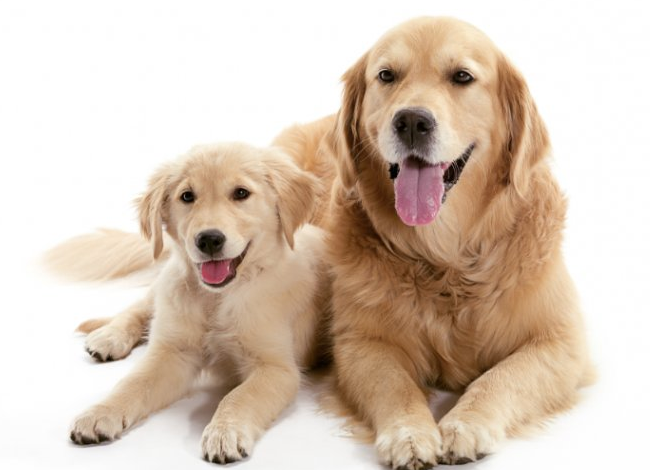

In [8]:
temp = requests.get(image_url).content
temp_img = BytesIO(temp)
img = Image.open(temp_img)
img

5. Azure API 호출해서 개체 인식

In [12]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures': 'Categories, Description, Color'}
data = {'url': image_url}

response = requests.post(detect_api, headers = headers, params = params, json = data)
result = response.json()
result

{'objects': [{'rectangle': {'x': 320, 'y': 23, 'w': 276, 'h': 444},
   'object': 'golden retriever',
   'confidence': 0.743,
   'parent': {'object': 'retriever',
    'confidence': 0.903,
    'parent': {'object': 'dog',
     'confidence': 0.931,
     'parent': {'object': 'mammal',
      'confidence': 0.942,
      'parent': {'object': 'animal', 'confidence': 0.942}}}}},
  {'rectangle': {'x': 55, 'y': 131, 'w': 276, 'h': 334},
   'object': 'golden retriever',
   'confidence': 0.523,
   'parent': {'object': 'retriever',
    'confidence': 0.728,
    'parent': {'object': 'dog',
     'confidence': 0.85,
     'parent': {'object': 'mammal',
      'confidence': 0.898,
      'parent': {'object': 'animal', 'confidence': 0.901}}}}}],
 'requestId': '7f6ebb7a-13cd-4582-9130-d56367f280ca',
 'metadata': {'height': 470, 'width': 650, 'format': 'Png'},
 'modelVersion': '2021-04-01'}

In [11]:
print(result['objects'][0]['object'])
print(result['objects'][1]['object'])

golden retriever
golden retriever


6. 개체의 좌표값을 가져와서 박스 그리기

In [14]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(img)

In [15]:
from traitlets.traitlets import ObjectName

def CreateRect(image_info):
  objects = image_info['objects']

  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    h = rect['h']
    w = rect['w']

    draw.rectangle(((x,y), (x+w, y+h)), outline = 'red')

    ObjectName = obj['object']
    draw.text((x,y), ObjectName, fill = 'blue')

{'rectangle': {'x': 320, 'y': 23, 'w': 276, 'h': 444}, 'object': 'golden retriever', 'confidence': 0.743, 'parent': {'object': 'retriever', 'confidence': 0.903, 'parent': {'object': 'dog', 'confidence': 0.931, 'parent': {'object': 'mammal', 'confidence': 0.942, 'parent': {'object': 'animal', 'confidence': 0.942}}}}}
{'rectangle': {'x': 55, 'y': 131, 'w': 276, 'h': 334}, 'object': 'golden retriever', 'confidence': 0.523, 'parent': {'object': 'retriever', 'confidence': 0.728, 'parent': {'object': 'dog', 'confidence': 0.85, 'parent': {'object': 'mammal', 'confidence': 0.898, 'parent': {'object': 'animal', 'confidence': 0.901}}}}}


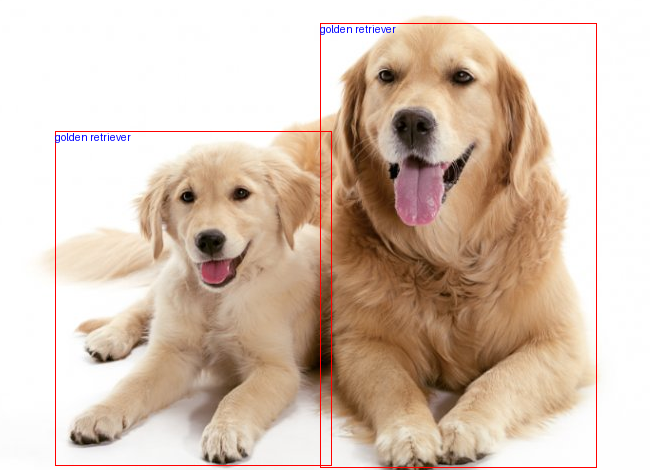

In [16]:
CreateRect(result)
img

**OCR 기능**

이미지에서 글씨 인식하기

1. OCR 엔드포인트 설정

In [17]:
ocr_api = endpoint_api + 'ocr'
print(ocr_api)

https://schcomputervision002.cognitiveservices.azure.com/vision/v3.2/ocr


2. 분석할 텍스트가 담긴 이미지를 불러오기

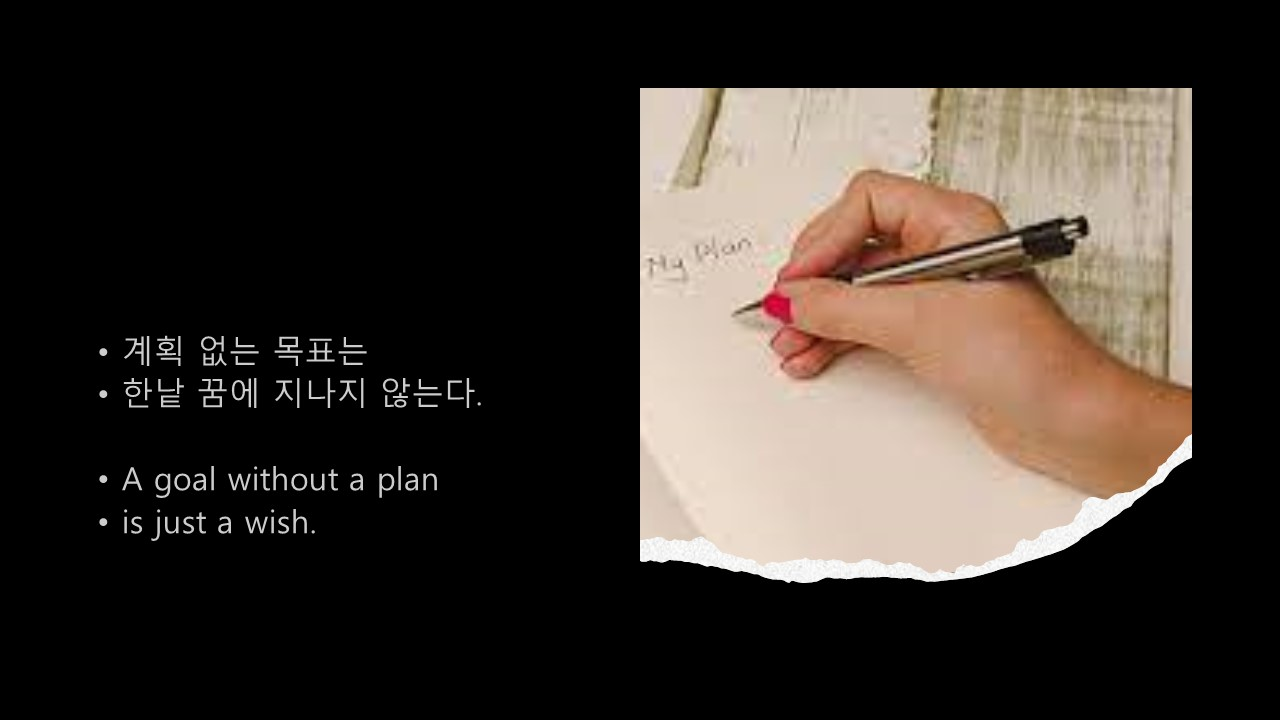

In [19]:
image_url = "https://velog.velcdn.com/images/lmlabs/post/537fb868-0b0f-43ba-9306-d7d085cbb317/image.JPG"
temp = requests.get(image_url).content
temp_img = BytesIO(temp)
img = Image.open(temp_img)
img

Azure API 호출하여 텍스트를 인식

In [20]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'languae': 'en', 'detectOrientation': 'true'}
data = {'url': image_url}

response = requests.post(ocr_api, headers = headers, params = params, json = data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '99,335,382,206',
   'lines': [{'boundingBox': '99,335,268,31',
     'words': [{'boundingBox': '99,348,9,8', 'text': '•'},
      {'boundingBox': '124,335,57,31', 'text': '계획'},
      {'boundingBox': '201,336,58,30', 'text': '없는'},
      {'boundingBox': '274,336,93,30', 'text': '목표는'}]},
    {'boundingBox': '99,378,382,30',
     'words': [{'boundingBox': '99,390,9,8', 'text': '•'},
      {'boundingBox': '124,378,60,30', 'text': '한낱'},
      {'boundingBox': '198,378,59,30', 'text': '꿈에'},
      {'boundingBox': '275,378,89,30', 'text': '지나지'},
      {'boundingBox': '383,378,98,30', 'text': '않는다.'}]},
    {'boundingBox': '99,466,338,32',
     'words': [{'boundingBox': '99,475,9,8', 'text': '•'},
      {'boundingBox': '122,467,20,24', 'text': 'A'},
      {'boundingBox': '155,466,59,32', 'text': 'goal'},
      {'boundingBox': '228,466,110,25', 'text': 'without'},
      {'boundingBox': '350,473,13,18', 't

In [21]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'languae': 'kr', 'detectOrientation': 'true'}
data = {'url': image_url}

response = requests.post(ocr_api, headers = headers, params = params, json = data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '99,335,382,206',
   'lines': [{'boundingBox': '99,335,268,31',
     'words': [{'boundingBox': '99,348,9,8', 'text': '•'},
      {'boundingBox': '124,335,57,31', 'text': '계획'},
      {'boundingBox': '201,336,58,30', 'text': '없는'},
      {'boundingBox': '274,336,93,30', 'text': '목표는'}]},
    {'boundingBox': '99,378,382,30',
     'words': [{'boundingBox': '99,390,9,8', 'text': '•'},
      {'boundingBox': '124,378,60,30', 'text': '한낱'},
      {'boundingBox': '198,378,59,30', 'text': '꿈에'},
      {'boundingBox': '275,378,89,30', 'text': '지나지'},
      {'boundingBox': '383,378,98,30', 'text': '않는다.'}]},
    {'boundingBox': '99,466,338,32',
     'words': [{'boundingBox': '99,475,9,8', 'text': '•'},
      {'boundingBox': '122,467,20,24', 'text': 'A'},
      {'boundingBox': '155,466,59,32', 'text': 'goal'},
      {'boundingBox': '228,466,110,25', 'text': 'without'},
      {'boundingBox': '350,473,13,18', 't